### Name : Shweta Ambadas Manche

## Task #1:Predict the percentage of student based on the no. of study hours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### import dataset

In [2]:
data_import="http://bit.ly/w-data"
data=pd.read_csv(data_import)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


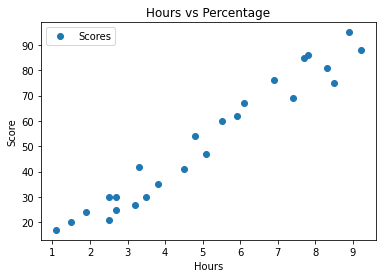

In [5]:
#plotting distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

from the above plot we see that there is positive relationship between number of hours studied and percentage score. 

### Spliting data into training and testing dataset

In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

### Training the Algorithm

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [9]:
print(regressor.intercept_)

2.0181600414346974


In [10]:
print(regressor.coef_)

[9.91065648]


### plotting regression line

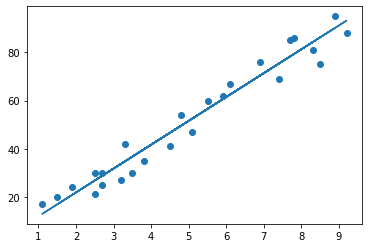

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### predictions making

In [12]:
y_pred=regressor.predict(X_test) # Predicting the scores

In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
# You can also test with your own data
Hours = 9.25
pred=regressor.predict([[Hours]])

In [15]:
#Mean square Error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [16]:
#R-square value
from scipy import stats
slope,intercept,r,p,std_err=stats.linregress(y_test,y_pred)
print('R-squared value:',r)

R-squared value: 0.9806835759589493


#### here R-squared value is 98% that means model explains 98% variability in the dependent variable by the independent variable